In [3]:
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from nltk.corpus import stopwords
from random import shuffle

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [6]:
analyser.polarity_scores("The movie is good!!")

{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.5399}

In [7]:
analyser.polarity_scores("The movie is bad")

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [8]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb <= -0.05):
        return -1
    else:
        return 0

In [35]:
def word_cloud(wd_list):
    stpword = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    print((all_words))
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stpword,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=31,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

In [12]:
from googletrans import Translator
translator = Translator()

In [13]:
translator.translate('Ciao, come bien?').text

'Hello, how bien?'

In [14]:
text = translator.translate('Ecco nel dettaglio i nuovi importi e limiti di reddito per assegni e pensioni di invalidita civile').text
analyser.polarity_scores(text)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [15]:
text

'Here are the new amounts and income limits for civil disability checks and pensions'

In [16]:
def sentiment_analyzer_scores(text, engl=False):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif lb <= -0.05:
        return -1
    else:
        return 0

In [17]:
text = 'the movie is very good'
sentiment_analyzer_scores(text)

1

In [18]:
text = 'o mar é azul'
sentiment_analyzer_scores(text, False)

0

In [20]:
import sys
import tweepy
import csv

In [21]:
consumer_key='IVSkMozP4K1hXdmCfUSFM7Du8'
consumer_secret='Ob6XoyxLCUsgjDZeDEctNsiDE5A63RwQiIW7fTPB3tpRXXITb3'
access_token='616315276-cS2ENY0FxPDZP2eBXX5s9Oe7cZ6LCSH6bvMO76Ot'
access_token_secret='yHltmRoAowdB81c8v7RBPkCF8qB7QgLKdQQHIKezfJJWB'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [258]:
tweets = api.user_timeline('@medi_pragma', count=10, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

RT @MarcoMiccinilli: IG followers: @msdsalute ranked 1st @medi_pragma @BettinaMaurer4 #IG #Instagram https://t.co/47bHuO5S0p

Newsletter #MediPragma
Pillole da il «Manuale di Marketing Research»
-vari scenari del mkt farmaceutico 
-case history, con soluzioni specifiche
-download dell'articolo tematico 
-distribuzione numerica delle maggiori specializzazioni mediche 
ISCRIVITI https://t.co/RnrcOYZdYI https://t.co/E0JFFY7Akc

#Instagram e Aziende Farmaceutiche, https://t.co/PDZzyqCe3L  
Ranking #Top10 profili IG con più follower. Medipragma supporta i propri clienti per comprendere il mercato e misurare le proprie performance.  #RicerchediMercato #Farmaceutico #MRX #IG #TOP10IG
https://t.co/DZLYmllVLI https://t.co/9X2NB4iOp3

RT @zerodotfour1: @boldrini_paola #paolaboldrini daniele.fabbro.16 @zerodotfour1 @medi_pragma #cartadeidirittidellapersonaconemofilia #fabi…

RT @zerodotfour1: #paolabinetti #adnkronos @medi_pragma @zerodotfour1 #zerodotfour daniele.fabbro.16 fabio.mazzeo #fabiomaz

In [22]:
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [260]:
user_id = 'medi_pragma' 
count=100

In [261]:
tw_medipragma = list_tweets(user_id, count)

In [23]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [24]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [264]:
import numpy as np
tw_medipragma = clean_tweets(tw_medipragma)

In [267]:
tw_medipragma[2]

'#Instagram e Aziende Farmaceutiche,   \nRanking #Top10 profili IG con più follower. Medipragma supporta i propri clienti per comprendere il mercato e misurare le proprie performance.  #RicerchediMercato #Farmaceutico #MRX #IG #TOP10IG\n '

In [266]:
sentiment_analyzer_scores(tw_medipragma[2])

1

In [25]:
def anl_tweets(lst, title='Tweets Sentiment', engl=False ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

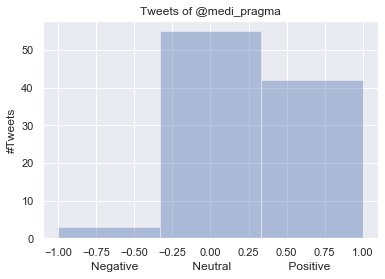

In [269]:
tw_medipragma_sent = anl_tweets(tw_medipragma, user_id)

 IG followers:  ranked 1st   #IG #Instagram  Newsletter #MediPragma
Pillole da il «Manuale di Marketing Research»
-vari scenari del mkt farmaceutico 
-case history, con soluzioni specifiche
-download dell'articolo tematico 
-distribuzione numerica delle maggiori specializzazioni mediche 
ISCRIVITI   #Instagram e Aziende Farmaceutiche,   
Ranking #Top10 profili IG con più follower. Medipragma supporta i propri clienti per comprendere il mercato e misurare le proprie performance.  #RicerchediMercato #Farmaceutico #MRX #IG #TOP10IG
    #paolaboldrini daniele.fabbro.16   #cartadeidirittidellapersonaconemofilia #fabi…  #paolabinetti #adnkronos   #zerodotfour daniele.fabbro.16 fabio.mazzeo #fabiomazzeo #danielefabb… Al vía l’evento istituzionale di valorizzazione e diffusione della #cartadeidiritti della Persona con #emofilia     #GiornataMondiale della #BPCO
#SPIROTRAIN  Newsletter Medi-Pragma
Pillole da il «Manuale di Marketing Research»
-vari scenari del mkt farmaceutico 
-case history, c

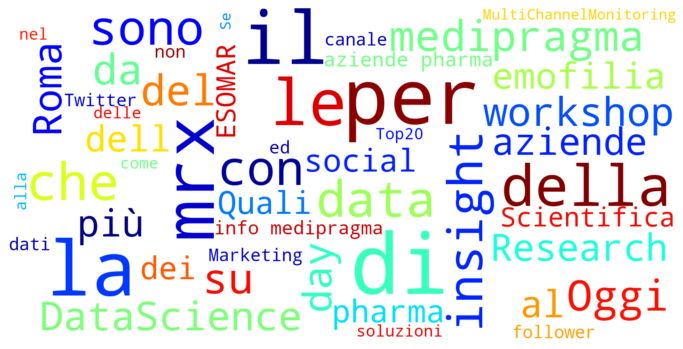

In [270]:
word_cloud(tw_medipragma)

In [26]:
def twitter_stream_listener(file_name,
                            filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
    class CustomStreamListener(tweepy.StreamListener):
        def __init__(self, time_limit):
            self.start_time = time.time()
            self.limit = time_limit
            # self.saveFile = open('abcd.json', 'a')
            super(CustomStreamListener, self).__init__()

        def on_status(self, status):
            if (time.time() - self.start_time) < self.limit:
                print(".", end="")
                # Writing status data
                with open(file_name, 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow([
                        status.author.screen_name, status.created_at,
                        status.text
                    ])
            else:
                print("\n\n[INFO] Closing file and ending streaming")
                return False

        def on_error(self, status_code):
            if status_code == 420:
                print('Encountered error code 420. Disconnecting the stream')
                # returning False in on_data disconnects the stream
                return False
            else:
                print('Encountered error with status code: {}'.format(
                    status_code))
                return True  # Don't kill the stream

        def on_timeout(self):
            print('Timeout...')
            return True  # Don't kill the stream

    # Writing csv titles
    print(
        '\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'
        .format(file_name, time_limit, filter_track))
    with open(file_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['author', 'date', 'text'])

    streamingAPI = tweepy.streaming.Stream(
        auth, CustomStreamListener(time_limit=time_limit))
    streamingAPI.filter(
        track=filter_track,
        follow=follow,
        locations=locations,
        languages=languages,
    )
    f.close()

In [275]:
filter_track = ['sclerosimultipla']
file_name = 'Sclerosi_twitter.csv'
twitter_stream_listener (file_name, filter_track, time_limit=60)


[INFO] Open file: [Sclerosi_twitter.csv] and starting 60 seconds of streaming for ['sclerosimultipla']



[INFO] Closing file and ending streaming


In [273]:
import time

In [237]:
file_name = 'Influencer.csv'
df_tws = pd.read_csv(file_name, encoding='utf8')
df_tws.shape

(1124, 3)

In [239]:
from collections import Counter
pd.set_option('display.max_rows', 4000)
print(pd.DataFrame(zip(Counter(post).values(),Counter(post).keys())).sort_values(by=0, ascending=False).reset_index())

      index     0                                                 1
0         3  1143                                  sclerosimultipla
1         2   502                                              aism
2        33   303                                      lameladiaism
3        38   244                                          smuoviti
4        31   159                                 multiplesclerosis
5        99   150                                            repost
6         1   140                                                sm
7       105   138                                         melagioco
8        30   137                                           ricerca
9        29   120                                  giovanioltrelasm
10      126   108                                         aismonlus
11       12    89                                ricercascientifica
12       16    71                                             smile
13      254    70                               

In [242]:
df_tws['Influencer'].value_counts()

aism_cuneo                        66
aismsezionepotenza                44
aism_onlus                        40
lauradeluca_photo                 37
sedottaesclerata                  31
aism_milano                       31
aism_lecce                        27
valentina_rovetto_                21
tittalife                         19
aismpisa                          19
broken_jl7                        18
salutesicilia                     17
aism_palermo                      16
aismbrescia                       14
160cm.it                          13
valepap_b17                       12
aismlucca                         12
giacomo_brock                     11
lavitapossibile                   11
aism_teramo                       10
aism_sezione_como                  9
sclerosimultiplae                  9
vitaconlizzie                      7
aismbari                           7
tavrunners                         7
aism_bat                           7
volon_lep_sm_ester_onlus           6
f

In [69]:
df_tws['text'] =  clean_tweets(df_tws['Hashtags'])

In [231]:
df_tws.head()

,Influencer,Hashtags,Post
0,ohga,"['#aism', '#mele', '#ricerca', '#sm', '#sc...",Pippo Musso e la vita oltre la SLAScendere nel...
1,aism_onlus,"['#ricettesenzaglutine', '#ricettevegetariane...",E voi avete visto cambiare il modo di curarvi ...
2,broken_jl7,"['#facebook', '#sedottaesclerata', '#aismyou...",Non sar di certo una flebo attaccata a fermare...
3,broken_jl7,"['#sclerosimultipla', '#nonsimollauncazzo', ...",Non posso correre al pari degli altri ma posso...
4,ivancottini,"['#aism', '#aismlecce', '#aismonlus', '#ass...",E GI PROPRIO COS hall rs r life dimariadefilip...


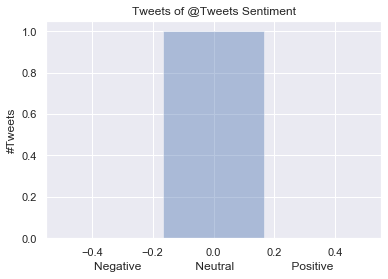

In [322]:
df_tws['sent'] = anl_tweets(df_tws.text)

In [177]:
type(df_tws['Hashtags'])

pandas.core.series.Series

love
books sm aism sclerosimultipla meladiaism msfighter consiglidilettura senzaglutine aspettote aiutiamolaricerca sclerosimultipla sm dona dolcefit ricercascientifica raccoltafondi sclerosimultipla bookstagram sclerosimultipla lanostracitta smile messina running sclerosi smile aismsicilia citazionedelgiorno staytuned tittalife instabook muscoli ricettedietetiche informa sostienilaricercascientifica giovanioltrelasm ricerca aism sclerosimultipla aism multiplesclerosis fun aism lameladiaism lameladiaism assoraiderscaut allergie italia movement smuoviti dono lentatesulseveso cycle giovanioltrelasm libero danza lameladiaism photooftheday italia sclerosimultipla vidasana lameladiaism sclerosimultipla sediajob yogadolce sicily sclerosimultipla greenapple tittainformasenzasacrifici volontari lanostracitta help lungoviaggio riabilitazione dona tattoostyle lovestory parkinson smile multiplesclerosis ricercascientifica salutebenessere resilient socialepalermo neuroscience gorizia aism a italy 

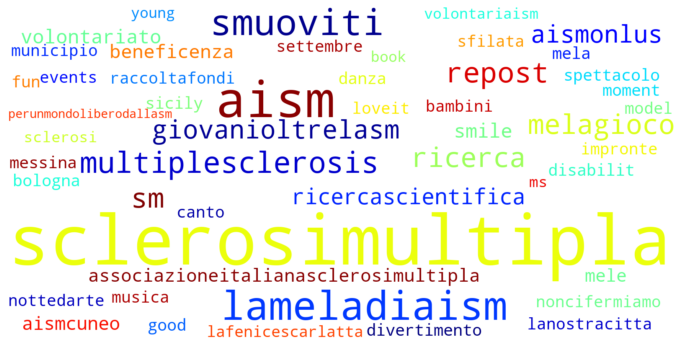

In [238]:
df_tws['Hashtags'] = df_tws.Hashtags.apply(lambda x: x[1:-1].split(","))
post = []
for index, row in df_tws.iterrows():
    for word in row['Hashtags']:
        word = re.sub(r"[^a-zA-Z]", "", word)
        post.append(word.lower())
print((word))
shuffle(post)
word_cloud(post)

ohga aism_onlus broken_jl7 broken_jl7 ivancottini vitaconlizzie bauzik_athletic_alpacas piazza_risorgimento_cerveteri demetrio_buroni farmaciafalaschi aismperugia aism_roma aism_milano aism_onlus cherchi.patrizia ale_vo_90 aismpisa williamtosoni91 poliambulatorio_ptc lavitapossibile happyhourrevolution psicologaclarameo sedottaesclerata silvia_trolese aismbari femme.fatale_95 aismrieti scarolariccia_ross tittalife sedottaesclerata lau139 uza_1980 ccsvi3 aism_milano giacomo_brock nexus81 pasticceria_elisir_capostrada lorestacco aismcaserta aism_cuneo valentina_laguardia sclerosimultiplae ericatruelove3 aism_cuneo aism_cuneo davide__simeone aism_cuneo salutesicilia aism_onlus _georgedigiovanni rendiamovisibili alessiabruno___ aism_cuneo aism_onlus rorapisco93 creanza_creativemarket hooksitalia hooksitalia giacomo_brock aism_cuneo sud__life _frasi_.e._citazioni_ cristi82livorno aism_cuneo aism_cuneo aism_onlus aism_onlus ssplendoraa anna_mazzo aismsezionepotenza aismsezionepotenza dave_la

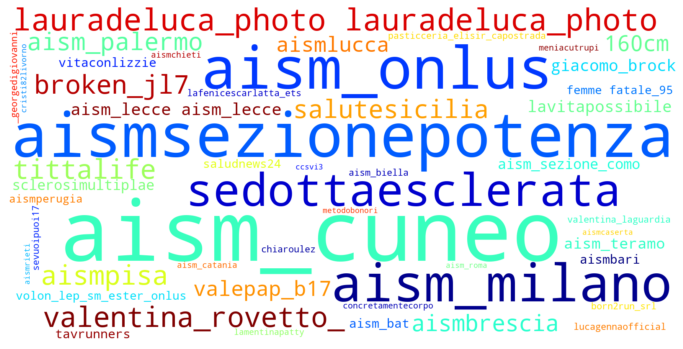

In [240]:
shuffle(df_tws['Hashtags'])
word_cloud(df_tws['Influencer'])

In [29]:
file_name = 'hashtags.csv'
hsh = pd.read_csv(file_name, encoding='utf8')
hsh.shape

(2071, 1)

In [30]:
hsh

,Hashtag
0,outfits
1,instagood
2,inspiration
3,model
4,boss
...,...
2066,gainwithbaghie
2067,malyali
2068,gerrybruh
2069,keralagodsowncountry


gainwithbundi fall motivation santiago flex followers blackisbeautiful quotes instalike saturday foodiesofinstagram girl instadaily poetsofig like french funny doggram instafashion onlineboutique african nakuru rapper makeup personalised gainwithbundi amoralamexicana anonymous lgbtpride isragay fashion love lovequotes petsofinstagram instagood violino like tflers skincaretips relationships comment spain picoftheday motivationalmonday instalike songs rotterdam catlove modellife photography selfietime q bass beautiful quotesdaily design mylove positivevibes life cute romantic explorepageready pureflorida ramatgan blackpanther supportsmallbusiness publicotucuenta interiors colores beautiful reference selfie home madeinfrance fashion sinsenosnohayparaiso travel like spokenword nigerianwedding followtrain scoutme married cinematography blackcatsofinstagram dog tweegram thalialegacy dogoftheday gardner baby humor gwendolynlyoung shoes quote motivation follow onlinebusiness paisaje blackandwh

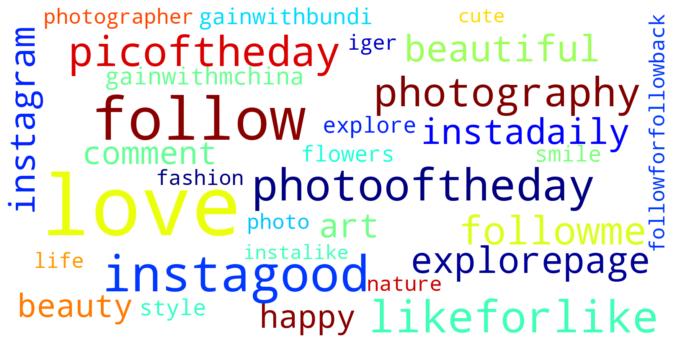

In [36]:
post = []
for index, row in hsh.iterrows():
    for word in row['Hashtag'].split():
        #word = re.sub(r"[^a-zA-Z]", "", word)
        post.append(word.lower())
        #print((word))
shuffle(post)
word_cloud(post)